In [2]:
import json
import glob

file_path = "D:\\DS4D\\twitter\\2017-09-22\\*.json"

for file_name in glob.glob(file_path):
    print (file_name)
    

D:\DS4D\twitter\2017-09-22\2017-09-22_00_05_01.json
D:\DS4D\twitter\2017-09-22\2017-09-22_01_05_01.json
D:\DS4D\twitter\2017-09-22\2017-09-22_02_05_01.json
D:\DS4D\twitter\2017-09-22\2017-09-22_03_05_01.json
D:\DS4D\twitter\2017-09-22\2017-09-22_04_05_01.json
D:\DS4D\twitter\2017-09-22\2017-09-22_05_05_02.json
D:\DS4D\twitter\2017-09-22\2017-09-22_06_05_01.json
D:\DS4D\twitter\2017-09-22\2017-09-22_07_05_01.json
D:\DS4D\twitter\2017-09-22\2017-09-22_08_05_01.json
D:\DS4D\twitter\2017-09-22\2017-09-22_09_05_01.json
D:\DS4D\twitter\2017-09-22\2017-09-22_10_05_02.json
D:\DS4D\twitter\2017-09-22\2017-09-22_11_05_01.json
D:\DS4D\twitter\2017-09-22\2017-09-22_12_05_01.json
D:\DS4D\twitter\2017-09-22\2017-09-22_13_05_01.json
D:\DS4D\twitter\2017-09-22\2017-09-22_14_05_01.json
D:\DS4D\twitter\2017-09-22\2017-09-22_15_05_01.json
D:\DS4D\twitter\2017-09-22\2017-09-22_16_05_01.json
D:\DS4D\twitter\2017-09-22\2017-09-22_17_05_01.json
D:\DS4D\twitter\2017-09-22\2017-09-22_18_05_01.json
D:\DS4D\twit

In [3]:
def load_tweets(file_name):
    with open(file_name, "r", encoding='utf-8') as f:
        tweets = (json.loads(line) for index, line in enumerate(f.readlines()))
        return tweets # # generator object

tweets = load_tweets("2017-09-23_07_05_01.json")

In [4]:
# next(tweets) # check

Attribute that might use for a single twitter:
Tweet related:
https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object
* ['id_str'] - String, unique identifier for this Tweet
* ['created_at'] - String, UTC time when this Tweet was created
* ['text'] - String, UTF-8 text of the status update.
* ['entities']['hashtags'] - list, e.g. [{'indices': [79, 86], 'text': 'Brexit'}]
* ['source'] - String, utility used to post the Tweet, as an HTML-formatted string


* ['favorite_count'] - int
* ['retweet_count'] - int
* ['quote_count'] - int
* ['reply_count'] - int

User related:
https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/user-object
* ['user']['id_str']
* ['user']['friends_count']
* ['user']['favourites_count']
* ['user']['followers_count']
* ['user'][statuses_count]

In [5]:
# tweeter json data to dataframe
import pandas as pd
d = {"id_str": [], "created_at": [], "text": [], "source": [], "hashtags": []} # col1. col2...

for t in tweets:
    d["id_str"].append(t["id_str"])
    d["created_at"].append(t["created_at"])
    d["text"].append(t["text"])
    d["source"].append(t["source"])
    d["hashtags"].append([hash_tag["text"] for hash_tag in t["entities"]["hashtags"]])

In [6]:
data = pd.DataFrame(d)
print(type(data["created_at"][0]))
data.head()

<class 'str'>


,created_at,hashtags,id_str,source,text
0,Sat Sep 23 06:05:03 +0000 2017,[],911471455543623680,"<a href=""http://twitter.com/#!/download/ipad"" ...",RT @damocrat: People like her &amp; her Tory h...
1,Sat Sep 23 06:05:05 +0000 2017,[Brexit],911471459993837568,"<a href=""http://twitter.com/download/iphone"" r...",RT @CraigWhitington: #Brexit - When should the...
2,Sat Sep 23 06:05:06 +0000 2017,"[Brexit, May]",911471467946225664,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Moody's stuft Bonität Großbritanniens ab - nur...
3,Sat Sep 23 06:05:08 +0000 2017,[Brexit],911471475521150976,"<a href=""http://www.google.com/"" rel=""nofollow...",Brexit: UK needs to clarify issues - Macron - ...
4,Sat Sep 23 06:05:08 +0000 2017,[],911471476116803584,"<a href=""http://twitter.com/download/android"" ...","RT @docrussjackson: An Englishman, a Scotsman ..."


In [7]:
# helper functions for data cleaning
def flat_list(nested_list):
    return [item for sublist in nested_list for item in sublist]

def lower_case(hash_tags):
    return [hash_tag.lower() for hash_tag in hash_tags]

In [8]:
# clean the data
# 1. hash tags to lower case
for index, hashtags in enumerate(data["hashtags"]):
    hashtags_lower = []
    for hashtag in hashtags:
        hashtags_lower.append(hashtag.lower())
        data["hashtags"][index] = hashtags_lower

In [9]:
import nltk
total_hashtags = flat_list( data["hashtags"])
hash_tags_dist = nltk.FreqDist(total_hashtags)
hash_tags_dist.most_common(50)

[('brexit', 1476),
 ('eu', 351),
 ('florencespeech', 330),
 ('referendum', 205),
 ('europe', 172),
 ('remain', 155),
 ('stopbrexit', 120),
 ('theresamay', 97),
 ('ukip', 78),
 ('catalunya', 63),
 ('uk', 60),
 ('refugeeswelcome', 55),
 ('occitània', 52),
 ('catnord', 52),
 ('alcaldes', 49),
 ('leave', 44),
 ('scotref', 43),
 ('1o', 41),
 ('news', 40),
 ('government', 40),
 ('may', 39),
 ('florence', 34),
 ('libre', 32),
 ('indyref2', 31),
 ('conservatives', 31),
 ('europeunion', 30),
 ('euref', 27),
 ('followfarage', 24),
 ('travel', 24),
 ('walkawaymay', 24),
 ('tcot', 24),
 ('catalonia', 22),
 ('europeanunion', 22),
 ('europa', 21),
 ('1oct', 21),
 ('immigration', 21),
 ('fintech', 20),
 ('brexitbetrayal', 19),
 ('brexitshambles', 18),
 ('obamacare', 17),
 ('maymustgo', 17),
 ('bbc', 15),
 ('bbcnews', 14),
 ('macron', 14),
 ('biafrareferendum', 14),
 ('tories', 13),
 ('destroyed', 13),
 ('r4today', 13),
 ('trump', 13),
 ('usa', 12)]

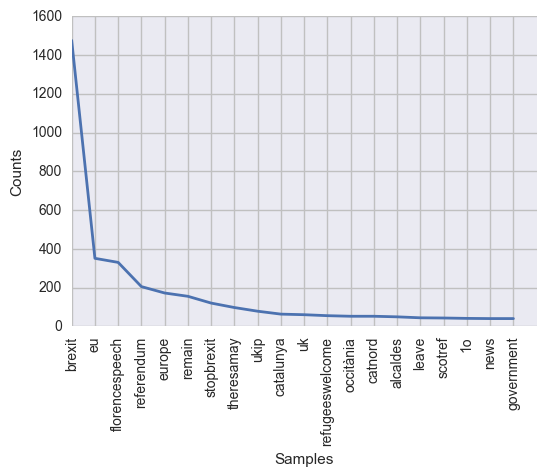

In [10]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid") # set aesthetics
sns.set(color_codes=True)

hash_tags_dist.plot(20) # top 20 hashtags


# series_hash_tags_dist = pd.Series(dict(hash_tags_dist))
# series_hash_tags_dist = series_hash_tags_dist.sort_values(ascending=False)

# series_hash_tags_dist[:10].plot(x=series_hash_tags_dist.index[:10])
# plt.tight_layout()

# sns.distplot(series_hash_tags_dist[:30])

In [ ]:
[{'indices': [79, 86], 'text': 'Brexit'}][0]